------------------------------------------
| | |
|:----------|:----------|
| Name      | Bayesian Modeling |
| Notebook  |  Bayes Theorem - Poisson-Gamma|
| Author    | Joshuah Touyz, PhD |
| Version   | 0.1 |
|Last update| 05/29/20 |
-------------------------------------------------

In [1]:
# Load librarires
import numpy as np
import scipy.stats as sc
import pandas as pd
import plotnine as pn

In [2]:
####################################
### Setting up the distributions ###
####################################
### Setting up prior ###
# Generate a random value from a gamma distribution
gamma_prior = lambda alpha, beta, size: np.random.gamma(shape=alpha, scale=1/beta, size =size)

### Setting data generating process ###
likelihood = lambda x,lambda_in: sc.poisson.pmf(k = x, mu = lambda_in)

### Posterior distribution ###
# Directly generate a sample from the posterior distribution
gamma_posterior = lambda xs,alpha,beta,size: gamma_prior(alpha+np.sum(xs), (beta+len(xs)), size)

### Beta probability ###
gamma_prob = lambda lambda_in, alpha, beta: sc.gamma.pdf(x = lambda_in, a = alpha, loc = 0, scale = 1/beta)

In [19]:
###############################################################
### Directly Generating the Posterior through Bayes Theorem ###
###############################################################
# Constants
alpha = 10 ; beta = 2
X = np.array([5])

round_val = 0
n_samples = 5000

# Calculating the pdf of the gamma prior directly
# lambdas = np.arange(0,15, step = 15/n_samples)
# pi_lambdas = gamma_prob(lambda_in = lambdas, alpha = alpha, beta = beta)

# Generating a random distribution of lambdas 
lambdas = gamma_prior(alpha = alpha, beta = beta, size = n_samples)
lambdas.sort()
lambdas, counts = np.unique(np.round(lambdas,round_val), return_counts = True)

In [10]:
lambdas

array([ 0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,  1.2,  1.3,  1.4,  1.5,
        1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,  2.3,  2.4,  2.5,  2.6,
        2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,  3.4,  3.5,  3.6,  3.7,
        3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,  4.5,  4.6,  4.7,  4.8,
        4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,  5.6,  5.7,  5.8,  5.9,
        6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,  6.7,  6.8,  6.9,  7. ,
        7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,  7.8,  7.9,  8. ,  8.1,
        8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,  8.9,  9. ,  9.1,  9.2,
        9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9, 10. , 10.1, 10.2, 10.3,
       10.4, 10.5, 10.6, 10.7, 10.8, 10.9, 11. , 11.1, 11.2, 11.3, 11.4,
       11.5, 11.6, 11.7, 11.8, 11.9, 12. , 12.1, 12.2, 12.3, 12.4, 12.5,
       12.6, 12.7, 12.8, 12.9, 13. , 13.1, 13.2, 13.3, 13.4, 13.5, 13.6,
       13.7, 13.9, 14. , 14.1, 14.2, 14.3, 14.4, 14.5, 14.6, 14.7, 14.9,
       15.1, 15.2, 15.3, 15.8, 16.2])

In [11]:
counts

array([    1,     1,     2,     2,     7,    19,    32,    65,   123,
         182,   298,   414,   553,   769,  1041,  1319,  1715,  2168,
        2492,  2979,  3573,  4206,  4853,  5451,  6292,  6909,  7591,
        8214,  8835,  9302, 10060, 10749, 11158, 11656, 12109, 12524,
       12654, 13011, 12964, 13322, 13121, 13207, 12923, 13001, 12880,
       12450, 12398, 12077, 11660, 11156, 10691, 10529,  9970,  9660,
        9154,  8572,  8135,  7756,  7464,  7113,  6717,  6099,  5800,
        5506,  5125,  4716,  4344,  4107,  3829,  3373,  3272,  2965,
        2827,  2595,  2368,  2111,  1968,  1790,  1599,  1501,  1375,
        1257,  1184,  1053,   904,   847,   759,   656,   600,   530,
         465,   489,   403,   347,   325,   289,   271,   225,   193,
         173,   168,   178,   133,   118,   102,    82,    95,    72,
          65,    58,    46,    48,    46,    32,    29,    17,    19,
          22,    17,    14,    16,    21,     9,    11,    14,     9,
          10,     6,

In [12]:
# Normalizing the counts to get the prior density (distribution)
pi_lambdas = counts/sum(counts) # counts/n_samples

# Calculating the likelihood
X_given_lambda = likelihood(x = X, lambda_in = lambdas)

# Posterior distribution 
normalizing_constant  = np.sum(X_given_lambda * pi_lambdas)
posterior_distribution  = (X_given_lambda * pi_lambdas) / normalizing_constant

# Normalizing theat and likelihood for plotting
density_X_given_lambdas = X_given_lambda/np.sum(X_given_lambda)
density_pi_lambda = pi_lambdas/np.sum(pi_lambdas) # density_pi_lambda = pi_lambdas, since sum(pi_lambdas) = 1


In [13]:
# --- Plotting inputs ----
# Setting up values
labels = ['Density Prior Pr(lambda)','Density Likelihood Pr(X|lambda)','Posterior Distribution Pr(lambda|x)']
values = [density_pi_lambda, density_X_given_lambdas, posterior_distribution]

# Setting up the dataframe
df_posterior = pd.DataFrame(dict(zip(['lambdas'] + labels, [lambdas] + values)))

# Re-formatting the data for plotting
df_posterior = df_posterior.set_index('lambdas').stack().reset_index().rename({'level_1':'Distributions',0:'Values'},axis = 1)

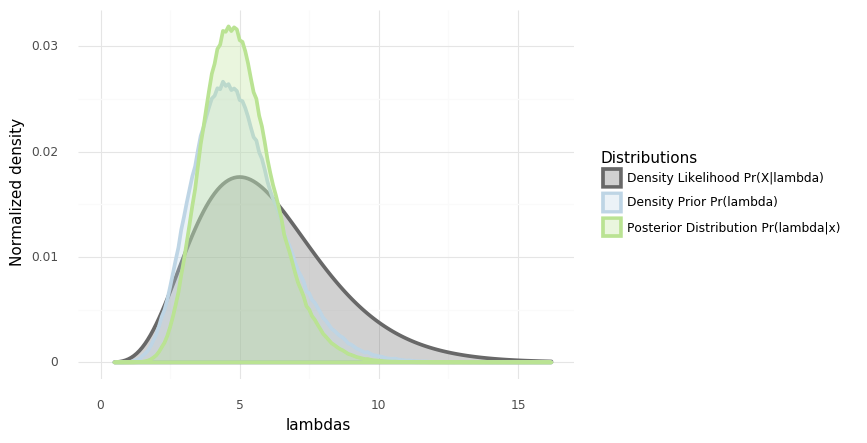

<ggplot: (-9223372036577140469)>

In [14]:
# Plot the prior, posterior and likelihood
colors = ['#BED5E5','#686868','#BAE393']
y_max = np.array(values).flatten().max()

# Plotting
pn.ggplot(pn.aes(x = 'lambdas', y = 'Values', color = 'Distributions', fill = 'Distributions'), data = df_posterior)\
            + pn.geom_area(size = 1.5, alpha = 0.3, position = 'identity')\
            + pn.scale_color_manual(dict(zip(labels,colors)))\
            + pn.scale_fill_manual(dict(zip(labels,colors)))\
            + pn.ylab('Normalized density')\
            + pn.theme_minimal()\
            + pn.xlim([0,lambdas.max()])\
            + pn.ylim([0, y_max])

In [23]:
##########################################
### Directly Generating the Posterior ###
##########################################

round_val = 0
n_samples = 5000

# Direct method simulating from the posterior (if the distribution is unknown)
posterior_direct_simulation = gamma_posterior(X,alpha,beta,n_samples)

# Direct method using the pdf/pmf of the posterior
lambdas_in = np.arange(0,15,15/n_samples) # 5000 points so we can merge with lambdas
posterior_direct_pdf = gamma_prob(lambdas_in ,alpha+np.sum(X), beta+len(X))

# Dataframe to compare results
df_posterior_direct = pd.DataFrame({'lambdas':lambdas_in,
                                    'posterior_direct_simulation':posterior_direct_simulation,
                                    'posterior_direct_pdf':posterior_direct_pdf})

df_posterior_direct

,lambdas,posterior_direct_simulation,posterior_direct_pdf
0,0.000,5.435033,0.000000e+00
1,0.003,2.844260,7.801882e-40
2,0.006,6.475224,1.266808e-35
3,0.009,4.989746,3.665048e-33
4,0.012,5.024039,2.038512e-31
...,...,...,...
4995,14.985,6.217545,1.418719e-07
4996,14.988,5.894088,1.409954e-07
4997,14.991,5.127616,1.401242e-07
4998,14.994,3.529105,1.392583e-07


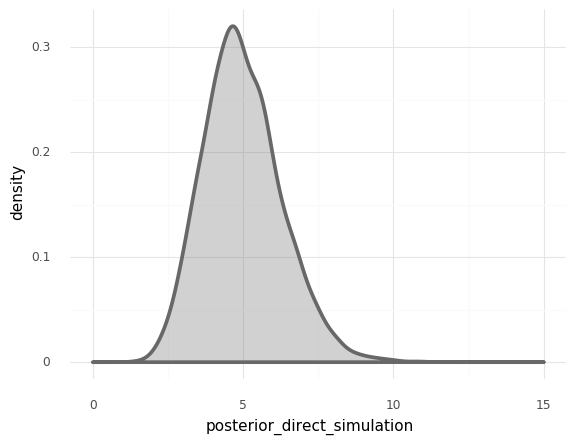

<ggplot: (-9223372036524647999)>

In [24]:
###################################
### Plot Posterior distribution ###
###################################
# Simulated 
pn.ggplot(data = df_posterior_direct)\
+ pn.geom_density(pn.aes('posterior_direct_simulation'), alpha = 0.3, fill = '#686868', color = '#686868', size = 1.5)\
+ pn.theme_minimal()\
+ pn.xlim(0,15)

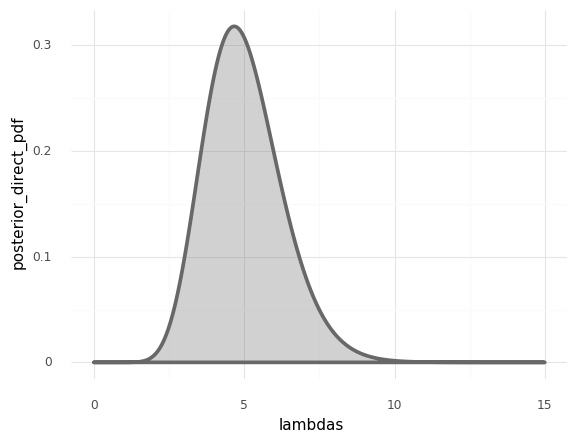

<ggplot: (327471722)>

In [25]:
# Using simulations
pn.ggplot(data = df_posterior_direct)\
+ pn.geom_area(pn.aes(x ='lambdas', y = 'posterior_direct_pdf'), alpha = 0.3, fill = '#686868', color = '#686868', size = 1.5)\
+ pn.theme_minimal()\
+ pn.xlim(0,15)